In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

#Libraries required for metrics
from sklearn.metrics import accuracy_score,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
os.listdir()

['.DS_Store',
 'creditcard.csv',
 'Credit_Card_Fraud_Detection.ipynb',
 '.ipynb_checkpoints']

In [3]:
#Loading the dataset
data = pd.read_csv("creditcard.csv")

In [4]:
#Basic description of data
data.shape

(284807, 31)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


There are no empty values in the columns. All the values are in either int or float format. So, there is no need for 
category encoding. The dataset is long and thin i.e, the number of rows is much greater than columns.
There are 30 predictors and 1 target variable named Class. 28 features are in the form of Principal Components to
protect user data.

### Exploratory Data Analysis

In [8]:
#Univariate Analysis

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

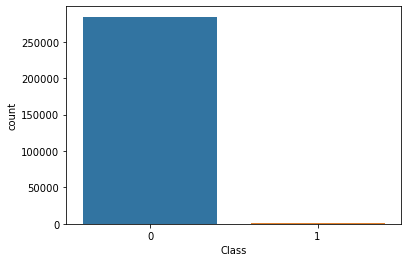

In [10]:
sns.countplot(x = 'Class',data = data)

Imbalanced Dataset - Requires Oversampling or Undersampling or a mix of both

In [11]:
col_names = list(data)
print(col_names)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


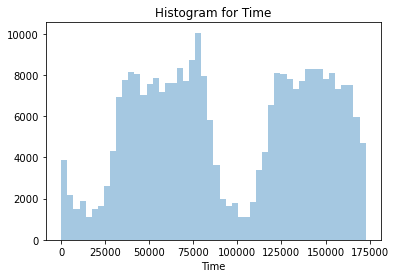

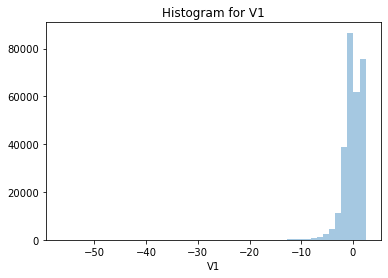

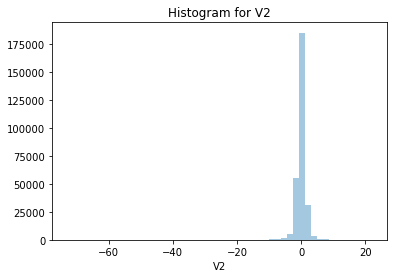

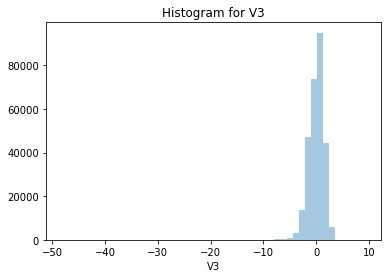

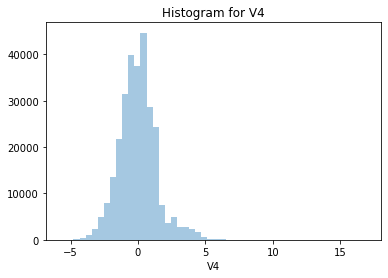

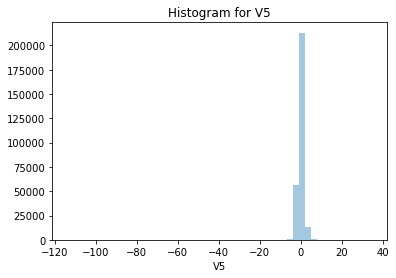

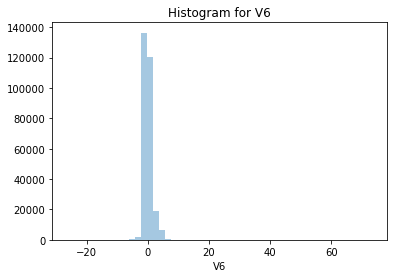

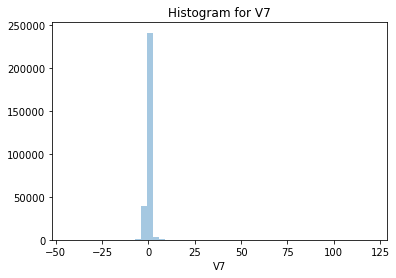

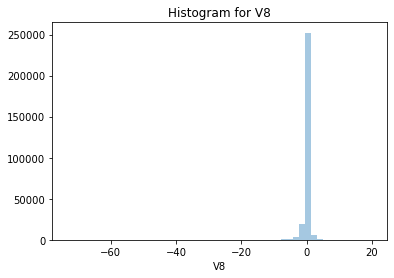

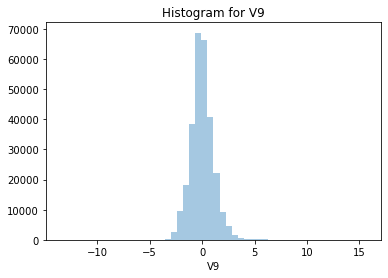

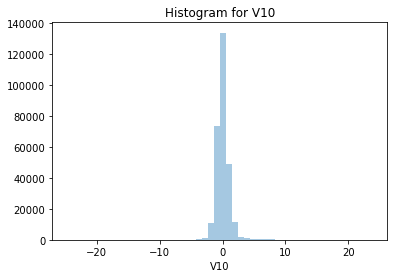

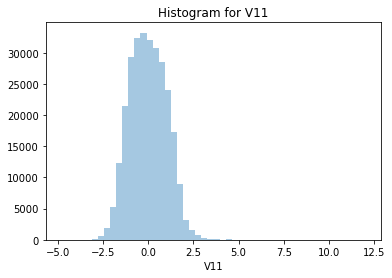

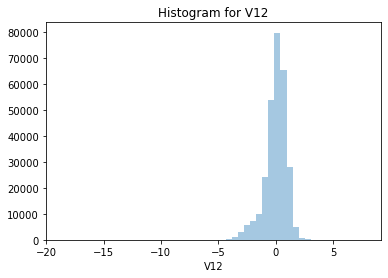

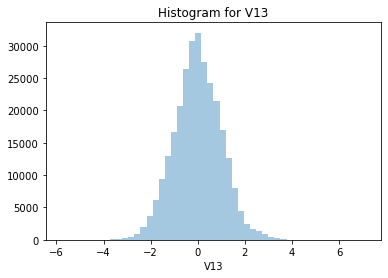

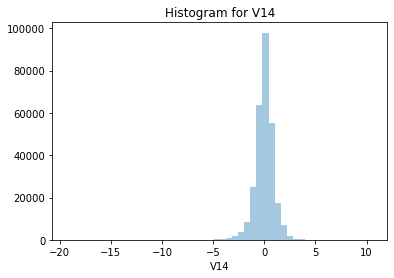

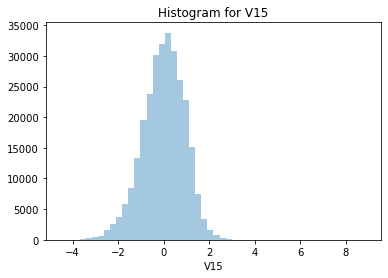

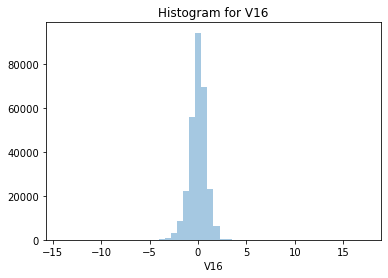

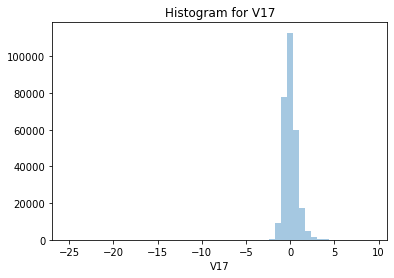

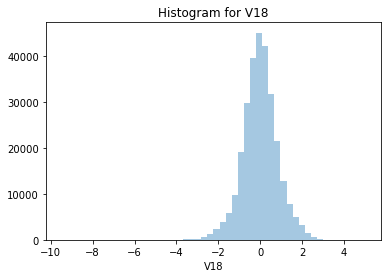

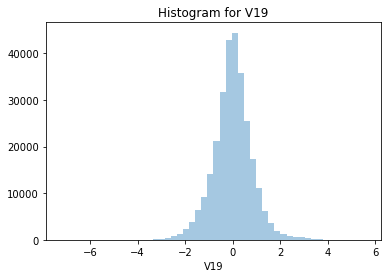

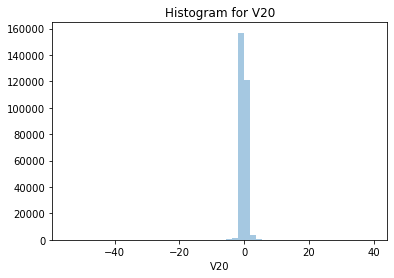

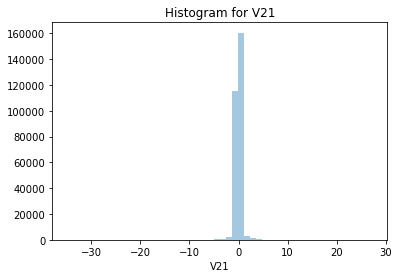

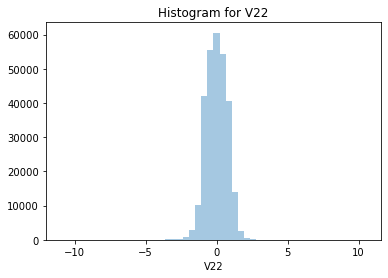

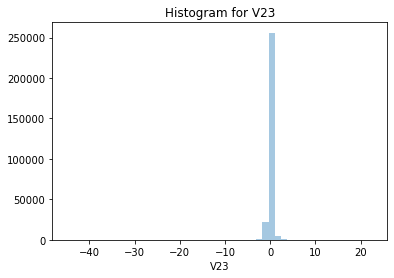

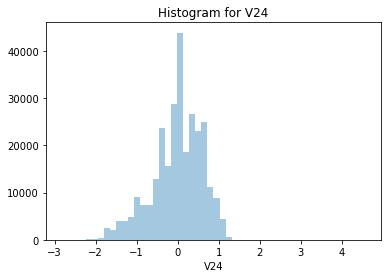

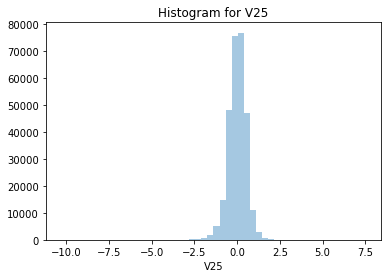

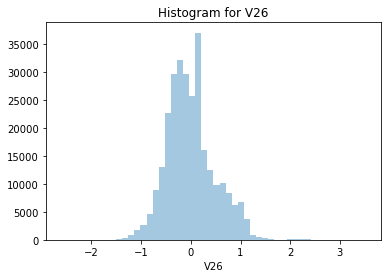

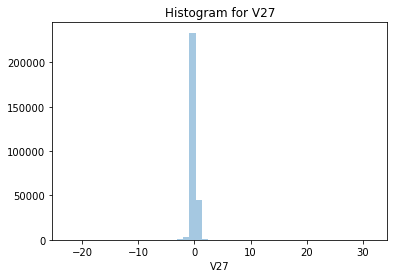

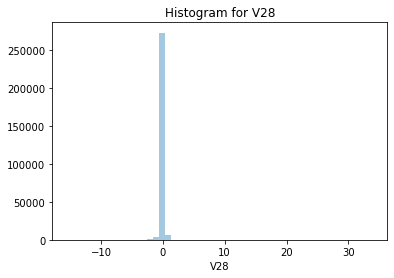

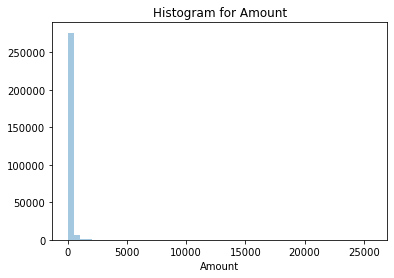

In [12]:
for feature in ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
                 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 
                 'V25', 'V26', 'V27', 'V28', 'Amount']:
    sns.distplot(data[feature],kde = False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

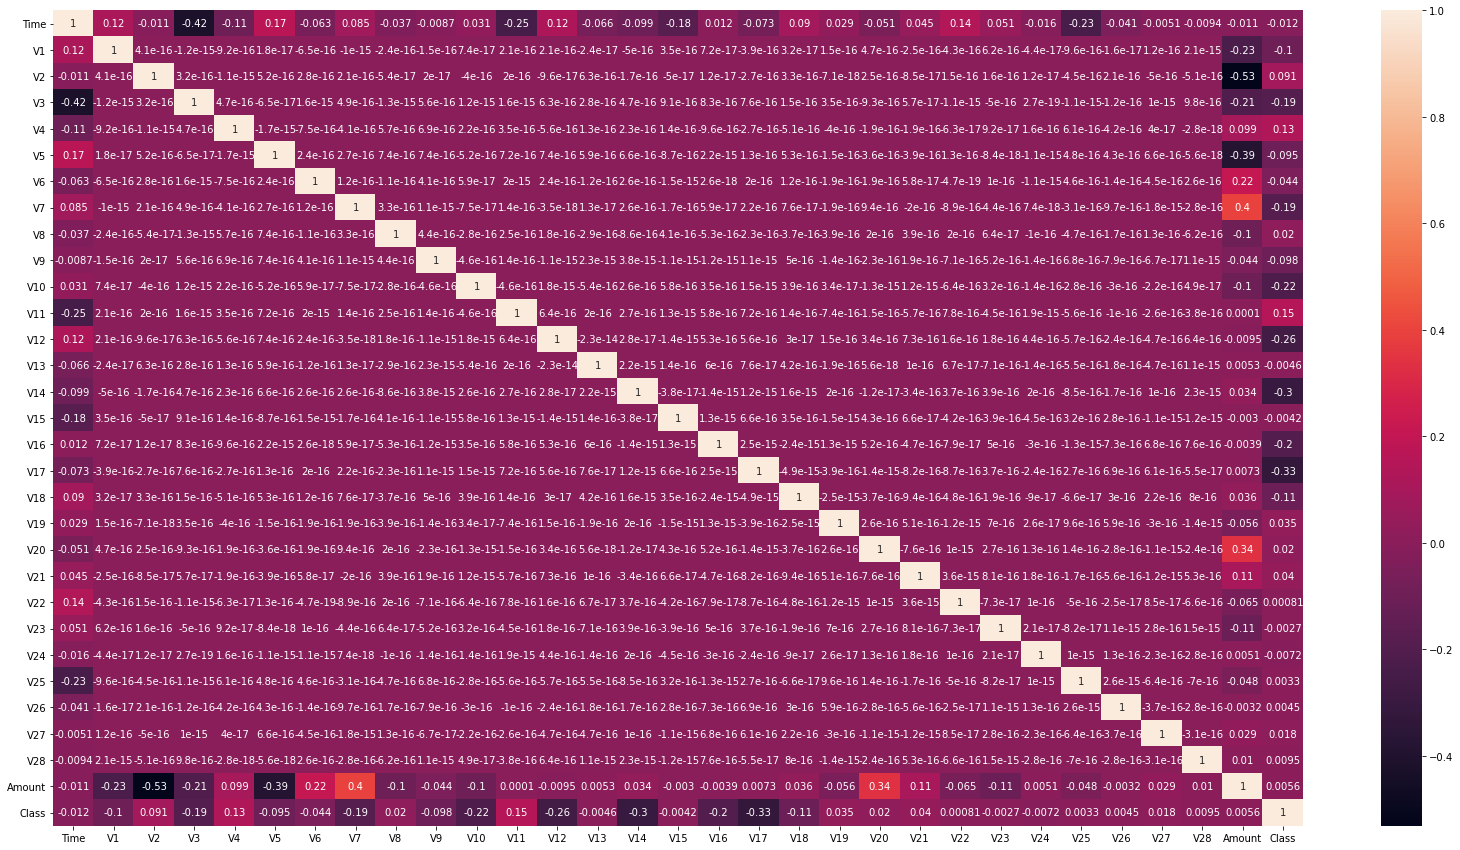

In [13]:
#Correlation Analysis
plt.figure(figsize = (28,15))
sns.heatmap(data.corr(),annot = True,fmt = '.2g')

In [14]:

c = data.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so[:10])
print(so[920:930])

V2      Amount   -0.531409
Amount  V2       -0.531409
V3      Time     -0.419618
Time    V3       -0.419618
V5      Amount   -0.386356
Amount  V5       -0.386356
V17     Class    -0.326481
Class   V17      -0.326481
        V14      -0.302544
V14     Class    -0.302544
dtype: float64
V11     Class     0.154876
Class   V11       0.154876
V5      Time      0.173072
Time    V5        0.173072
Amount  V6        0.215981
V6      Amount    0.215981
Amount  V20       0.339403
V20     Amount    0.339403
Amount  V7        0.397311
V7      Amount    0.397311
dtype: float64


In [15]:
#Imbalanced Data - Over sampling, under sampling, mix of both, smote

### Train and Test Split

In [16]:
from sklearn.model_selection import train_test_split
features = data.drop(['Class'],axis = 1)
labels = data['Class']
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.4,random_state = 101)

### ML models

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [18]:
#Logistic Regression
LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [19]:
#Random Forest
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
#Extreme Gradient Boosting
XGB = XGBClassifier()
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Testing

In [21]:
#Metrics for Imbalanced dataset - Precision, Recall, F1 score, ROC_AUC, confusion matrix

In [22]:
def evaluate_model(name,model,features,labels):
    pred = model.predict(features)
    accuracy = round(accuracy_score(labels,pred),4)
    precision = round(precision_score(labels,pred),4)
    recall = round(recall_score(labels,pred),4)
    F1_score = round(f1_score(labels,pred),4)
    roc_auc = round(roc_auc_score(labels,pred),4)
    print('{}--Accuracy: {} / Precision: {} / Recall: {} / F1_score: {} / ROC_AUC: {}'.format(name,accuracy,precision,
                                                                                recall,F1_score,roc_auc))

In [23]:
dict = {'Logistic Regression':LR,'RandomForest': RF,'XGBoost': XGB}
for name,mdl in dict.items() :
    evaluate_model(name,mdl,X_test,y_test)

Logistic Regression--Accuracy: 0.9991 / Precision: 0.8467 / Recall: 0.5979 / F1_score: 0.7009 / ROC_AUC: 0.7989
RandomForest--Accuracy: 0.9995 / Precision: 0.9277 / Recall: 0.7938 / F1_score: 0.8556 / ROC_AUC: 0.8969
XGBoost--Accuracy: 0.9995 / Precision: 0.9212 / Recall: 0.7835 / F1_score: 0.8468 / ROC_AUC: 0.8917


As the dataset is Imbalanced, Accuracy cannot be considered as an accurate metric. Random Forest gave the best results
among all the models

### Oversampling 

In [24]:
#pip install -U threadpoolctl

In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [26]:
oversample = SMOTE()
X, y = oversample.fit_resample(features,labels)
counter = Counter(y)
print(counter)
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size= 0.4, random_state= 101)

Counter({0: 284315, 1: 284315})


### RANDOM FOREST AFTER OVERSAMPLING

In [27]:
RF_resample = RandomForestClassifier()
RF_resample.fit(train_X, train_Y)
RF_resample_pred = RF_resample.predict(test_X)

In [28]:
evaluate_model('RandomForest_Re',RF_resample,test_X,test_Y)

RandomForest_Re--Accuracy: 0.9999 / Precision: 0.9998 / Recall: 1.0 / F1_score: 0.9999 / ROC_AUC: 0.9999


In [29]:
cm_resampled = confusion_matrix(test_Y, RF_resample_pred.round())

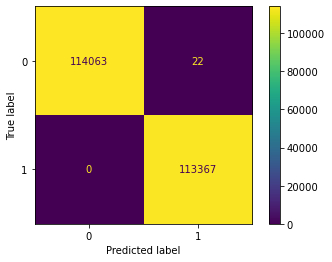

In [30]:
CM = ConfusionMatrixDisplay(confusion_matrix= cm_resampled , display_labels=RF_resample.classes_)
CM.plot()

Oversampling using SMOTE increased Recall, Precision, F1 score and ROC_AUC score as compared to the original model.